### Scribers
    Ito Elliot
    Motogawa Sean
    Serai Michael

# 7.2 Session Scribe for Introduction to Kernel Density Estimation

In [147]:
import random
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as pyplot

import matplotlib.pyplot as plt

import scipy as sp # provide scientific function such as for integration and optimization

get_ipython().magic('matplotlib inline')
from scipy import stats

### Histograms

Histograms are visualizations of the distribution of a dataset. They are similar to bar graphs that we have seen before but are different as histograms use bins to determine the number of bars, affecting the height of each bar. In the example below, we have set up 15 bins which house the data points, which are the ages of the professional football players on the New England Patriots Roster this year. 

(array([ 4.,  3.,  6., 14.,  3.,  7.,  7.,  2.,  1.,  2.,  1.,  0.,  0.,
         0.,  1.]),
 array([21.        , 22.33333333, 23.66666667, 25.        , 26.33333333,
        27.66666667, 29.        , 30.33333333, 31.66666667, 33.        ,
        34.33333333, 35.66666667, 37.        , 38.33333333, 39.66666667,
        41.        ]),
 <a list of 15 Patch objects>)

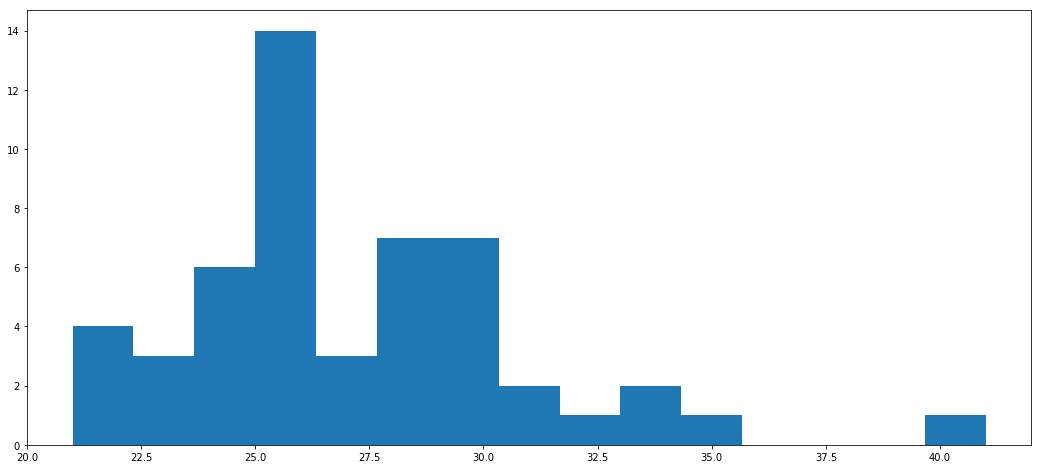

In [152]:
patriots_roster_age = [41, 29, 32, 24, 31, 28, 27, 30, 31, 27, 35, 27, 26,
                      28, 25, 28, 25, 33, 30, 33, 25, 23, 24, 26, 26, 24, 28, 23,
                      30, 30, 25, 28, 28, 26, 29, 22, 25, 25, 21, 30, 26, 23, 25, 28,
                      26, 22, 24, 22, 24, 24, 26]
pyplot.figure(figsize=(18,8))
plt.hist(patriots_roster_age, bins=15)

Despite histograms being fairly useful to visualize data, there are many issues when using them. To illustrate one of the issues with histograms, we will highlight the importance of proper bin width and spacing with the following example. As we can see, the data becomes difficult to read and differentiate between the bins. The sizing of the bins have a great effect on the height and the visualization of the histogram of the data being analyzed. 

(array([105.,  85., 119.,  99.,  86., 105.,  97., 115., 104.,  85.]),
 array([ 10. ,  19.9,  29.8,  39.7,  49.6,  59.5,  69.4,  79.3,  89.2,
         99.1, 109. ]),
 <a list of 10 Patch objects>)

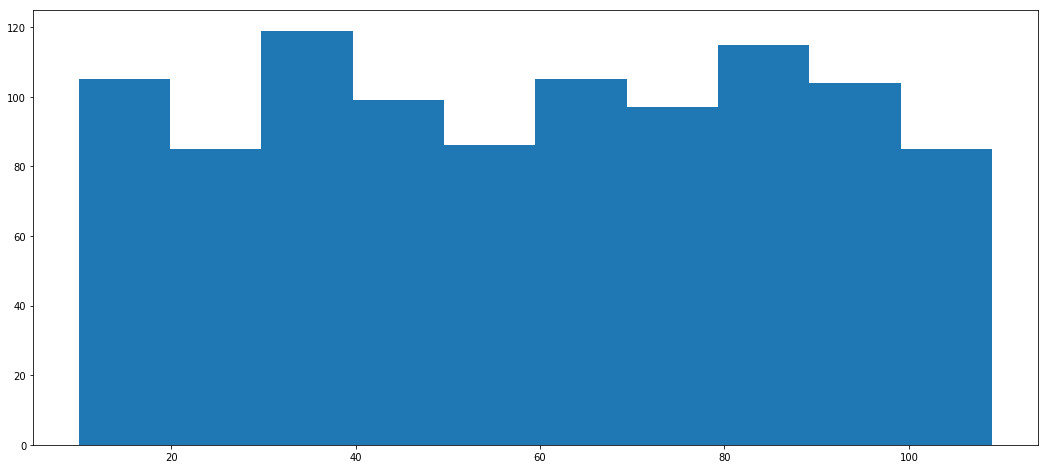

In [153]:
numbers = np.random.randint(10, 110, 1000)
pyplot.figure(figsize=(18,8))
plt.hist(numbers, bins=10)

### Aside: NumPy Arrays and Python Lists

Before we continue, let's go over some Python details regarding NumPy arrays and Python lists. Lists and Arrays are examples of data types, which are an attribute you can give to your data in the way you wish to represent it. If you are looking to use, "1, 2, 3" to reference identification numbers, their data type could be a string. If those same points of data are being used to add, their data type could be int.
Python Lists are collections of data that are ordered and can be manipulated. 

In [148]:
example_list = list((1, 2, "list", "python"))
example_list

[1, 2, 'list', 'python']

In [149]:
example_list[0] = "hi"
example_list

['hi', 2, 'list', 'python']

NumPy Arrays are also collections of data that are ordered and can be manipulated. As you can see, they share a similar structure to Python Lists. You can also iterate through and slice both Lists and Arrays. 

In [150]:
example_array = np.array([1, 2, "list", "python"])
example_array

array(['1', '2', 'list', 'python'], dtype='<U21')

In [151]:
example_array[0] = "hi"
example_array

array(['hi', '2', 'list', 'python'], dtype='<U21')

Two differences between NumPy Arrays and Python Lists are the compact nature of NumPy Arrays and the ability to perform arithmetic computations on NumPy Array data. NumPy Arrays are more efficient containers for large data sets of the same type. As you can see in the image below, Python Lists reference and point to other objects, making NumPy Arrays densely packed container more efficient when iterating through the dataset. 

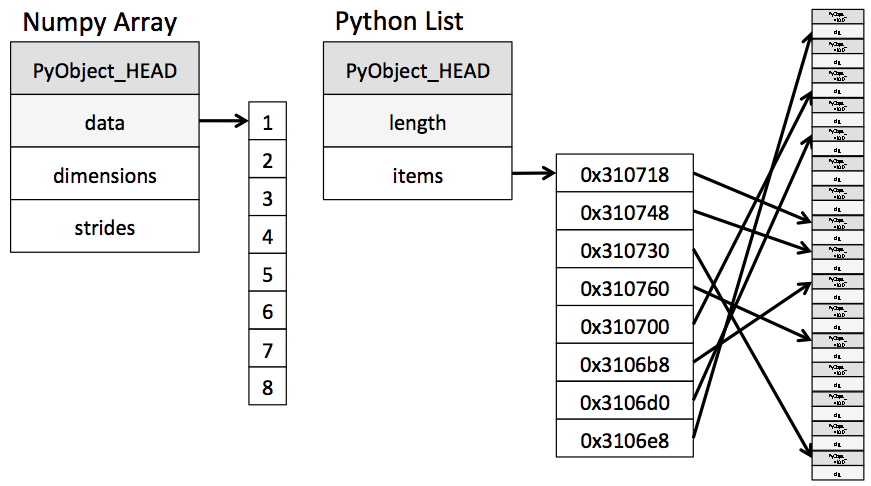

An analogy of the differences between NumPy Arrays and Python Lists can be envisioned when shopping, by relating NumPy Arrays to a department store like Macy's, and Python Lists to a shopping mall with many stores. In the department store, the many different items that you are purchasing are separated into sections of the same store. To purchase the same items throughout the shopping mall, you need to visit several different stores to purchase the same items. 

In addition NumPy have statistical methods like finding the max of an array which Python lists do not. These additional features of the NumPy Array comes at a cost as adding new elements to a NumPy array requires creating a new NumPy array - as opposed to a simple append. Thus it is important to know what the benefits and limitations are when choosing between different datatypes when parsing and analyzing data.

### Kernels and KDEs

As we have talked about, histograms have a problem where the bin boundries have a great effect on the resulting visual of the dataset. This is where kernels and kernel density estimation come in.

Instead of having a bin size of a set range, let us assume we have a block of size 1 for each point in a dataset. This block is called a kernel. The resulting visual would look something like this:

![Example Kernel](http://128.171.10.138:4000/assets/ipynb/week_7/images/top_hat_1.png)

Now we have what looks like an overlap between two or more blocks. Now let us increase the height of the blocks by one in the regions of the overlap. We would continue adding a height of one until we have no more overlap. The resulting graphic would be something like this:

![Example Kernel Height](http://128.171.10.138:4000/assets/ipynb/week_7/images/top_hat_2.png)

If we were to use this type of kernel density called tophat on the dataset that we showed with histograms, the result would be the following visual:

![Example Tophat Kernel](http://128.171.10.138:4000/assets/ipynb/week_7/images/top_hat_example.png)

Kernel Density Estimation (KDE) is a method of representing data by producing a kernel function centered upon each data point in the dataset. The kernel functions are then summed to provide a density estimate of the dataset you wish to represent. Now as one may see the resulting graphic is a rather jagged histogram. However, this jagged histogram represents the underlying data better than histograms. 

Unlike histograms, we do not have a dependence on the size of the bin since we center the block around each datapoint with each block being the same size. Thus it is a deterministic operation. The height of the histogram provides insight into areas (datapoints) without coverage. As a result we can make reasonable inferences about the dataset from a finite data sample. Another benefit of using KDE is the ability to use different kernels. 

### Using Different Kernels

While using square blocks as the kernel for density estimation is useful for determining values where no data points may lie, sometimes the square kernel may put more value in areas along the distribution than expected. One other option is to use a kernel that isn't a square block, such as a Gaussian distribution.

By centering the Gaussian distribution around each data point and giving it some standard deviation, we obtain multiple distributions that can be summed at each point to form a density estimation similar to using squares as kernels. 

![Gaussian Distribution](http://128.171.10.138:4000/assets/ipynb/week_7/images/gaussian_kernel.png)

The resulting density estimation plot is much smoother than the estimation used with square kernels due to the less jagged plot lines. The Gaussian kernel can also be normalized just like the Tophat kernel to show probability distributions for the population. The Gaussian kernel can also give more accurate probabilities to the overall estimation by giving less probability the points further from the centered data point. Tophat kernels give all data points within the width of the square an equal value, while the Gaussian will give less to those further away.


![Compare Kernels](http://128.171.10.138:4000/assets/ipynb/week_7/images/final_kernel.png)

### Other KDE Kernels

Gaussian and Tophat kernels aren't the only kernels used for Kernel Density Estimation. Other kernels such as exponential or cosine could be used if they more accurately fit the distribution of the data. Picking the kernel that gives the most accurate representation of the data is important to create a useful density estimation plot.

![Other Kernels](http://128.171.10.138:4000/assets/ipynb/week_7/images/kernels.png)

#### Differences Between Kernels

There are two main differences between all of the kernels. First of all, each kernel affects the values of the neighboring points differently from each other. A Tophat kernel will put equal value on all neighboring points, while a Gaussian kernel will put less value on neighboring points further away from the centered data point. Another difference that is more relevant with large data samples is how quickly the kernel density estimations can be computed. Gaussian kernels will take longer to compute due to the computer needing to calculate each probability of the neighboring points, while a Tophat kernel will give each neighboring point a value of one.

### Kernel Density Estimation cont.

Furthermore, we can analyze the process through the KDE algorithm, which states:

```
For each value along the `x` axis:
    For each data sample for which pdf(x) is not null
        y = sum of all such pdf
        ```

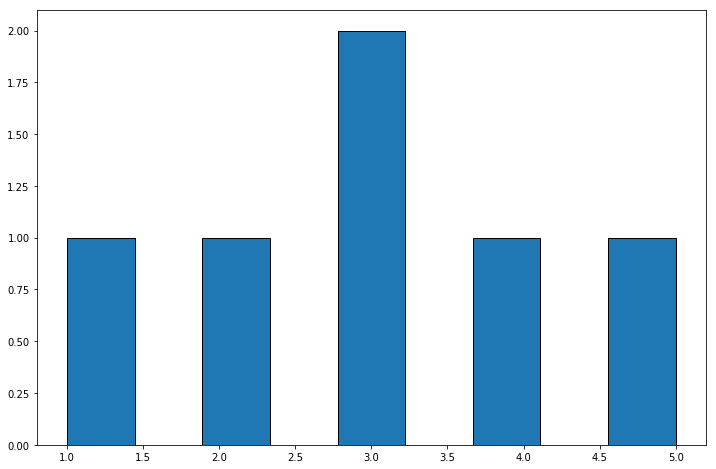

In [154]:
total = [1, 2, 3, 3, 4, 5]
pyplot.figure(figsize=(12,8))
_= plt.hist(total, bins=9, edgecolor="black",align='mid')

#### Examples

Below is an example of a tiny arbitrary dataset illustrating the process of providing kernels for each data point, and having the KDE computed by the stats.gaussian_kde class, where the dataset is defined as "total" and the bandwidth estimator is "0.3."

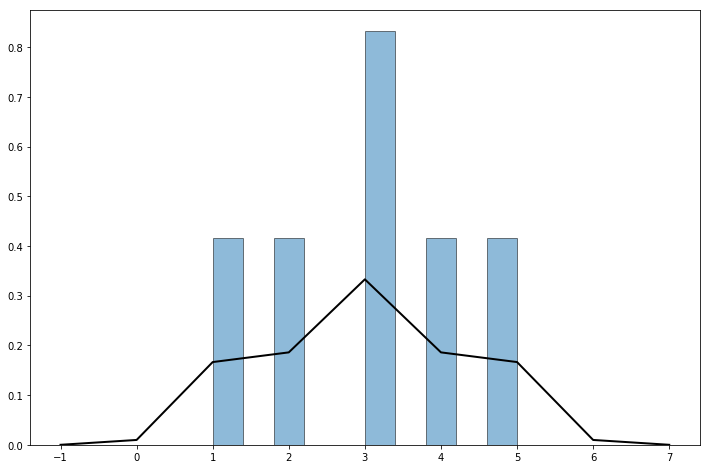

In [155]:
total = [1, 2, 3, 3, 4, 5]
x_values = np.arange(-1, 8, 1)
kde = sp.stats.gaussian_kde(total, bw_method=0.3)
density = kde.evaluate(x_values)
fig = pyplot.figure(figsize=(12,8))
plt.hist(total, bins=10, edgecolor="black", density=True, alpha=0.5, align="mid")
pyplot.plot(x_values, density, lw=2, color="black")

On to a far more specific example, we have the concession stand sales reports for two sports arenas. One sells their food and beverages for an average of 5 dollars, and the other 16 dollars.


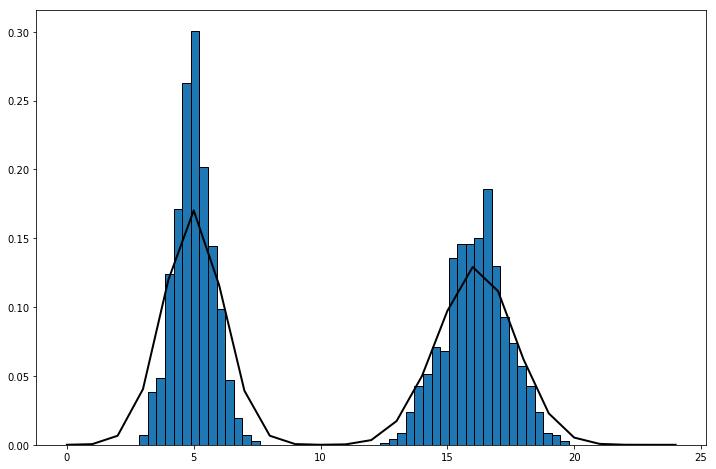

In [156]:
arena_1_mean, arena_1_scale = 5, .75
arena_2_mean, arena_2_scale = 16, 1.25

arena_1 = np.random.normal(arena_1_mean, arena_1_scale, 1000)
arena_2 = np.random.normal(arena_2_mean, arena_2_scale, 1000)

totals = np.concatenate([arena_1, arena_2])

x_values = np.arange(0, 25, 1)
kde = sp.stats.gaussian_kde(totals, bw_method=0.16)
densities = kde.evaluate(x_values)
fig = pyplot.figure(figsize=(12,8))
plt.hist(totals, bins=50, edgecolor="black", density=True, alpha=1)
pyplot.plot(x_values, densities, lw=2, color="black")

#### Bandwidth 
Bandwidth is an important parameter when calculating the KDE because it determines how smooth or jagged the curve is. If the bandwidth is too large, the KDE's shape be too smooth, as shown below.

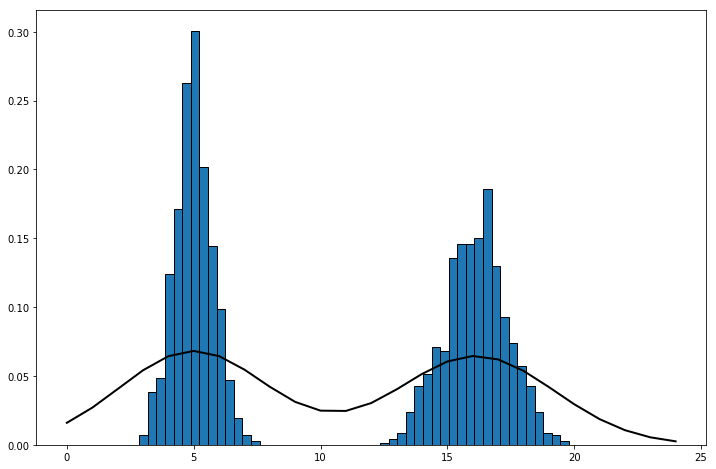

In [157]:
kde = sp.stats.gaussian_kde(totals, bw_method=0.5)
densities = kde.evaluate(x_values)
fig = pyplot.figure(figsize=(12,8))
plt.hist(totals, bins=50, edgecolor="black", density=True, alpha=1)
pyplot.plot(x_values, densities, lw=2, color="black")

A bandwidth too small will look too jagged...

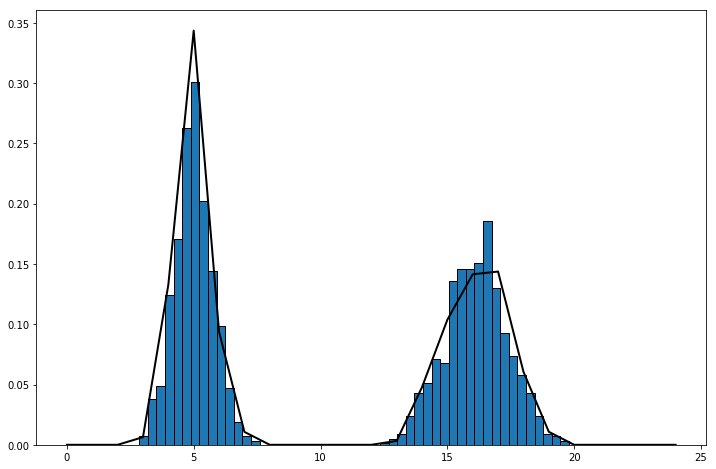

In [158]:
kde = sp.stats.gaussian_kde(totals, bw_method=0.01)
densities = kde.evaluate(x_values)
fig = pyplot.figure(figsize=(12,8))
plt.hist(totals, bins=50, edgecolor="black", density=True, alpha=1)
pyplot.plot(x_values, densities, lw=2, color="black")

Choosing a proper bandwidth for your data set needs to be narrow enough to hold all the relevant data points while not being too jagged, a problem called the Bias-Variance Tradeoff.

There are four different types of results that we deal with, and it is hard to get the type that we want.

<img src="http://128.171.10.138:4000/assets/ipynb/week_7/images/bias_variance_1.png" width="500">

We want to have low bias and low variance, but this can be hard to come by. It also shows how there is no free lunch,  as it is very unlikely to get low bias and low variance, but high bias and low variance or low bias and high variance. Trying to make a model to fit the data can result in different problems which can be described in the following graphic:

<img src="http://128.171.10.138:4000/assets/ipynb/week_7/images/bias_variance_2.png" width="1000">


If we try and make the model fit a high variance too much, we get overfitting where our models fits the sample dataset over the actual dataset (where our sample comes from). If we have high bias, we get underfitting where we don't really get anything useful from the model. Thus we want to have a low bias and low variance to create a good balence for the model. 


#### Optimal Kernel Bandwidth

To determine the optimal bandwidth, we can perform one of two strategies.
The first, using closed-form solution which uses the following formula:
\begin{equation}
h=(\frac{4\sigma^5}{3n})^\frac{1}{5}
\end{equation}
or the second, relying on cross-validation, meaning that a subset of the data is used to generate a KDE, and another subset to compare to the bandwidth. 

Unfortunately, to get the best bandwidth param is often with a closed-form solution which would require manual tweaking of the suggested value. This would allow the creation of the most intuitive visual of the point distribution. It is of course subjective, and it presents an interesting question in regards to how one should go about and explain the reasoning behind the visual.

#### Statistical Functionality of scipy.stats

We can look further into the scipy.stats module and find additional functionality that interests us for the course. Among the features include sampling and computing the pdf and logpdf which uses the parameter "totals" from the above example.

In [159]:
norm_0_1 = sp.stats.norm(totals)
sampling_data = norm_0_1.rvs()
norm_0_1.pdf(sampling_data)


array([0.28170033, 0.3686468 , 0.30705535, ..., 0.21516042, 0.39811118,
       0.28690823])

In [160]:
norm_0_1.logpdf(sampling_data)

array([-1.26691143, -0.99791627, -1.18072724, ..., -1.53637141,
       -0.92102398, -1.24859287])

#### Aside: Other areas
Kernels and the notion of overfitting, underfitting and a good balance are used in a variety of fields.

##### <b>Machine Learning</b>
It should come to no suprise that machine learning would use both of these things. In particular convolutional neural networks (CNNs) use kernels. An example of this would be best shown for 2D:

![2D Convolution](https://cdn-images-1.medium.com/max/1600/0*jL2-1xfsWaxIMdGW)

*Source: https://medium.com/inveterate-learner/deep-learning-book-chapter-9-convolutional-networks-45e43bfc718d*

In this example the kernel is the 3x3 matrix that goes over the 4x4 matrix that results in the 2x2 output matrix. (More information can be found here https://arxiv.org/pdf/1603.07285.pdf)

As for the notion of overfitting, underfitting and a "good balance", this is in regards to how the algorithm approximates nonlinear functions (there is more to this, but we will leave it at this).

![Example Machine Learning Overfit and Underfit](https://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png)

The graphic shows what the aproximation looks like when we underfit, have a good match and overfit. As we may guess, underfitting matches the overall trend, but does not match any minute details (note the increase of value at larger x is not seen), as compared to overfitting where the approximation is results in matching most of the points in the dataset (learning the noise than the trend).

*Source https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html*

##### <b>Image Processing</b>
Like machine learning, image processing uses kernels when changing what an image looks like. In this case kernels operate the same way they would in CNNs, but on images. Kernels can be used for multiple things (like blurring, edge detection, sharpening). Here we will show how kernels can find edges (we won't go into the details, but instead will show the results):

Inital image and Final image

![Inital Image](https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png) ![Final Image](https://upload.wikimedia.org/wikipedia/commons/6/6d/Vd-Edge3.png)
*Sources: https://en.wikipedia.org/wiki/File:Vd-Orig.png and https://en.wikipedia.org/wiki/File:Vd-Edge3.png*

In addition for both, there can be padding to make the output dimensions and kernel size independent. There are different types of padding and we are showing one type (same padding) where the pading has a value of 0.

![Same Padding](https://cdn-images-1.medium.com/max/800/1*1okwhewf5KCtIPaFib4XaA.gif)
*Source: https://medium.com/inveterate-learner/deep-learning-book-chapter-9-convolutional-networks-45e43bfc718d*

### Log-transformation

As we have covered, when doing hypothesis testing it is easier to have data that follow bell-shaped distributions. However this is not always the case. Many times we may have to work with data that is a highly skewed distrubtion. In cases like this, transformation of the data would be required to analyze the data effectively. Examples of highly skewed distributions would be that of wealth as seen in the below graphic.

![image](https://www.cbo.gov/sites/default/files/images/pubs-images/51846-coverlarge-figure.png)
*From https://www.cbo.gov/publication/51846*

If we were to view this as a distribution, we would have a large amount of people on the low end of the scale for wealth and very few people on the high end of the scale that is magnitudes higher than that of the low end. This presents a problem when doing hypothesis testing. To make it easier to do testing, we would transform the data. However, a simple scaling transformation would not solve the issue of large difference the low end of the scale is from the high end. This is where transformations like log-transformation comes in. This would allow us to normalize the data in order to convert it into something easier to deal with. 

#### ￼Log transform Example

Let us work with an actual example dataset which will be talked about further in the aside. We will be looking at the distribution of out degrees in a network map of the internet (from 1999 - source: http://networksciencebook.com/translations/en/resources/data.html). We are including the method used to download and mainipulate the dataset prior to the analysis. Note that downloading the zip file may take some time. For those who want to have the zip file, please change ```zipfile.open("internet.edgelist.txt")``` to ```"internet.edgelist.txt"```. In addition, make sure that the file is in the same directory as the notebook.

In [161]:
# From: https://stackoverflow.com/questions/5710867/downloading-and-unzipping-a-zip-file-without-writing-to-disk
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
resp = urlopen("http://networksciencebook.com/translations/en/resources/networks.zip")
zipfile = ZipFile(BytesIO(resp.read()))
internet = pd.read_csv(zipfile.open("internet.edgelist.txt"), sep='\t', names = ["in", "out"])

Now let's see the histogram that is created from the node counts for out-degrees.

<Figure size 864x576 with 0 Axes>

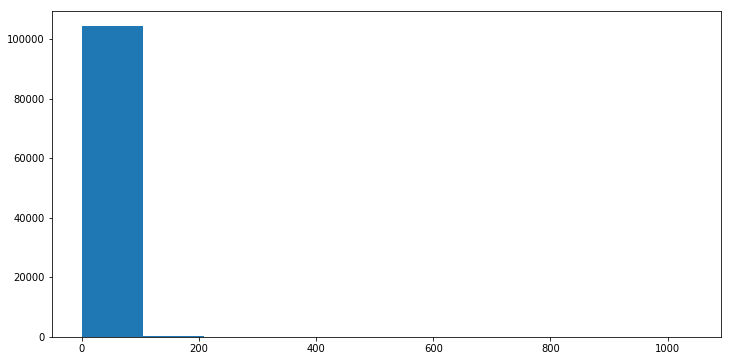

In [162]:
# We group by the in node as we want to see the number of out degrees. The dataset is setup where each line in the file is source_id \t destination_id
in_degrees =  internet.groupby("in").count() 

fig = pyplot.figure(figsize=(12,8))
plt.figure(figsize=(12,6))
_ = plt.hist(in_degrees.values)

As we can see, this dataset is heavily skewed with many nodes (websites) not having many out-degrees (essentially sites that do not have many links) and very few nodes having a large out-degree (websites that have a lot of links). Now let's change this dataset with log-transform and see how the histogram looks.

<Figure size 864x576 with 0 Axes>

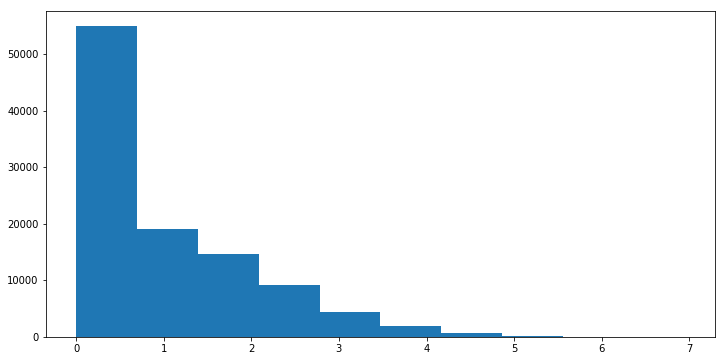

In [163]:
log_in_degrees = np.log(in_degrees.values)
fig = pyplot.figure(figsize=(12,8))
plt.figure(figsize=(12,6))
_ = plt.hist(log_in_degrees)

It is a lot better as we can now see a curve as compared to the previous histogram. This distribution appears to be similiar to the power law distribution, which we will give an example next.

#### Distribution Example

Let us show an example of the distribution that we see in the example shown which is a power law distribution. Here we are generating an array of size 1000 using the power law distribution with a shape parameter of 0.25 (we often use log-transformations, even log-log transformations to check for a power law distribution - this will be covered slightly in the aside section). 

In [164]:
pl_distrib = sp.stats.powerlaw(0.25).rvs(1000)

<Figure size 864x576 with 0 Axes>

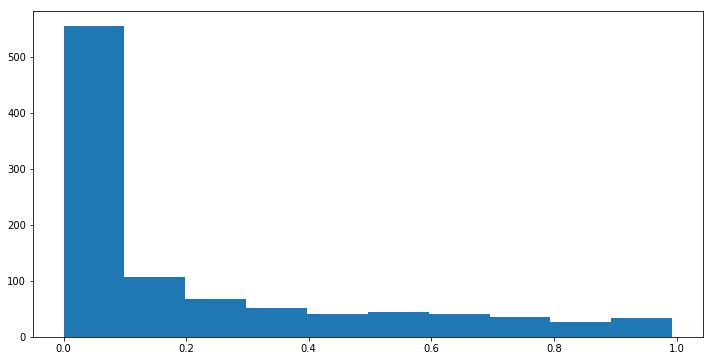

In [165]:
fig = pyplot.figure(figsize=(12,8))
plt.figure(figsize=(12,6))
_ = plt.hist(pl_distrib)

Below we are showing the pdf of the distribution. 

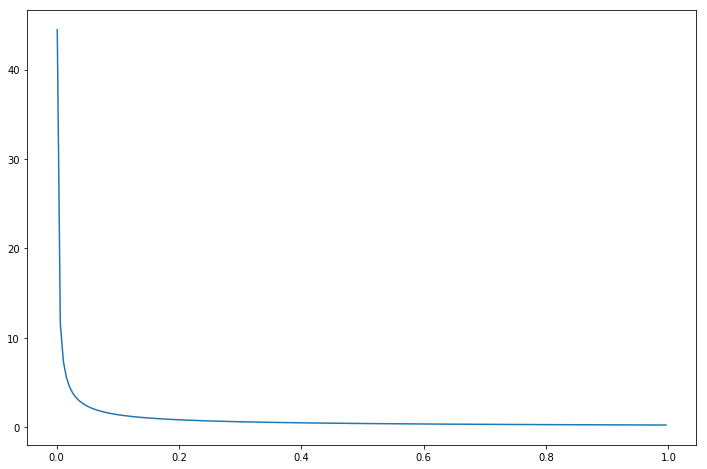

In [166]:
fig = pyplot.figure(figsize=(12,8))
x_axis = np.arange(0.001, 1, 0.005)
y_axis = sp.stats.powerlaw(0.25).pdf(x_axis)
plt.plot(x_axis, y_axis)

#### Exceptions

It is always important to note that one should not use the log-transformation for every skewed distribution, as using log will have a large impact on the data that is being transformed. An analogy of what is occuring is that the log transformation is bringing out extra information that would have been hidden otherwise due to the magnitude of differences between the smallest and largest values. However, this also means that log-transformation should be used in cases of large discrpencies as if it is used on smaller differences, the transformed data may not be useful. In events like this, other methods of transformation like square root may work better. 


#### Aside: Other areas

The usage of log-transformation is seen in other areas besides data science.

##### <b>Network Science</b>
It is not suprising that we would use log or log-log transformations in other areas that deal with highly skewed distributions. In network science we use log-log transformation to check for a power law distribution on the in and out degrees of a newtork to see if the network is a scale-free network. A scale-free network being a network whose in and out degree distributions are that of a power law. (For more information see http://networksciencebook.com/chapter/4#power-laws.) In the example below, this is of the "in" and "out" degree distributions of the first WWW map from Hawoong Jeong at the University of Notre Dame. The green line is a Poisson distribution for the data and the purple being the log-log.

![Example from http://networksciencebook.com/#figure-4-2](http://networksciencebook.com/images/ch-04/figure-4-2.jpg "From: http://networksciencebook.com/#figure-4-2")
*From http://networksciencebook.com/#figure-4-2*

Note the difference we have here as compared to our example with the log-transformation.

##### <b>Image transformation</b>
For images in grayscale, log transformations can be used to change the intensity of the image. The lower intensity images would be brought to higher levels of intensity, while at the same time keeping or supressing the already high levels of intensity that the image has. This would bring out details that would otherwise be hard to see or unseen. Examples of this can be found here: https://homepages.inf.ed.ac.uk/rbf/HIPR2/pixlog.htm 

